In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df = pd.read_csv('disney_movies.csv.xls', encoding_errors = 'ignore')

In [8]:
df.columns

Index(['movie_title', 'release_date', 'genre', 'mpaa_rating', 'total_gross',
       'inflation_adjusted_gross'],
      dtype='object')

In [11]:
df.to_excel('output_file.xlsx', index=False)

**Cleaning Data**

In [37]:
df.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,is_franchise,release_year,release_month
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,False,1937,December
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,False,1940,February
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,False,1940,November
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,False,1946,November
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,False,1950,February


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   mpaa_rating               523 non-null    object
 4   total_gross               579 non-null    int64 
 5   inflation_adjusted_gross  579 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 27.3+ KB


In [14]:
df.describe()

,total_gross,inflation_adjusted_gross
count,5.790000e+02,5.790000e+02
mean,6.470179e+07,1.187625e+08
std,9.301301e+07,2.860853e+08
min,0.000000e+00,0.000000e+00
25%,1.278886e+07,2.274123e+07
50%,3.070245e+07,5.515978e+07
75%,7.570903e+07,1.192020e+08
max,9.366622e+08,5.228953e+09


In [39]:
df.shape

(579, 9)

In [18]:
df.duplicated().sum()

np.int64(0)

In [35]:
df.isnull()


,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,is_franchise,release_year,release_month
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
574,False,False,False,False,False,False,False,False,False
575,False,False,False,False,False,False,False,False,False
576,False,False,False,False,False,False,False,False,False
577,False,False,False,False,False,False,False,False,False


In [27]:
df.isnull().sum()

movie_title                 0
release_date                0
genre                       0
mpaa_rating                 0
total_gross                 0
inflation_adjusted_gross    0
dtype: int64

In [ ]:
df['mpaa_rating']=df['mpaa_rating'].fillna('Not Rated')

In [26]:
df['genre'] = df['genre'].fillna('Other')

In [36]:

keywords = ['2', '3', 'Live Action', 'Remake', 'Part']
df['is_franchise'] = df['movie_title'].str.contains('|'.join(keywords), case=False)


In [32]:
df.dropna(subset=['is_franchise'], inplace=True)

In [34]:
df['release_date'] = pd.to_datetime(df['release_date'])

df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month_name()

In [41]:
df['inflation_multiplier'] = df['inflation_adjusted_gross'] / df['total_gross']

In [43]:
df.dtypes

movie_title                         object
release_date                datetime64[ns]
genre                               object
mpaa_rating                         object
total_gross                          int64
inflation_adjusted_gross             int64
is_franchise                          bool
release_year                         int32
release_month                       object
inflation_multiplier               float64
dtype: object

In [42]:
df.to_csv('disney_movies_cleaned.csv', index=False)
df.to_excel('disney_movies_cleaned.xlsx', index=False)

**Exploratory Data Analysis**

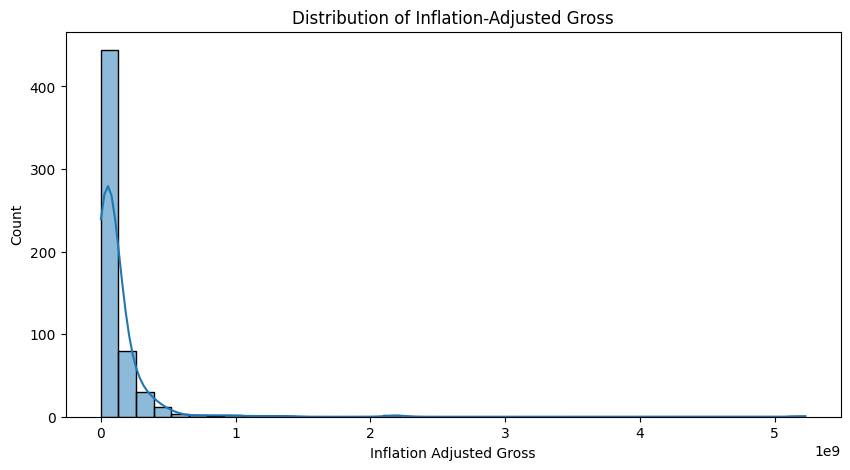

In [44]:
# Inflation-adjusted gross distribution
plt.figure(figsize=(10,5))
sns.histplot(df['inflation_adjusted_gross'], bins=40, kde=True)
plt.title("Distribution of Inflation-Adjusted Gross")
plt.xlabel("Inflation Adjusted Gross")
plt.show()


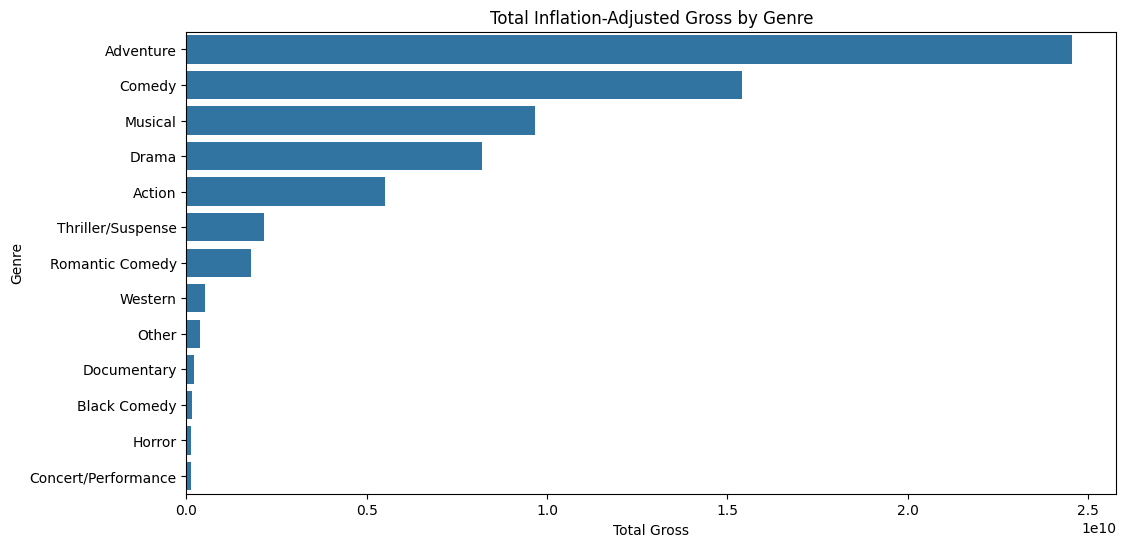

In [45]:
# Total Revenue by Genre
genre_gross = df.groupby('genre')['inflation_adjusted_gross'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=genre_gross.values, y=genre_gross.index)
plt.title("Total Inflation-Adjusted Gross by Genre")
plt.xlabel("Total Gross")
plt.ylabel("Genre")
plt.show()


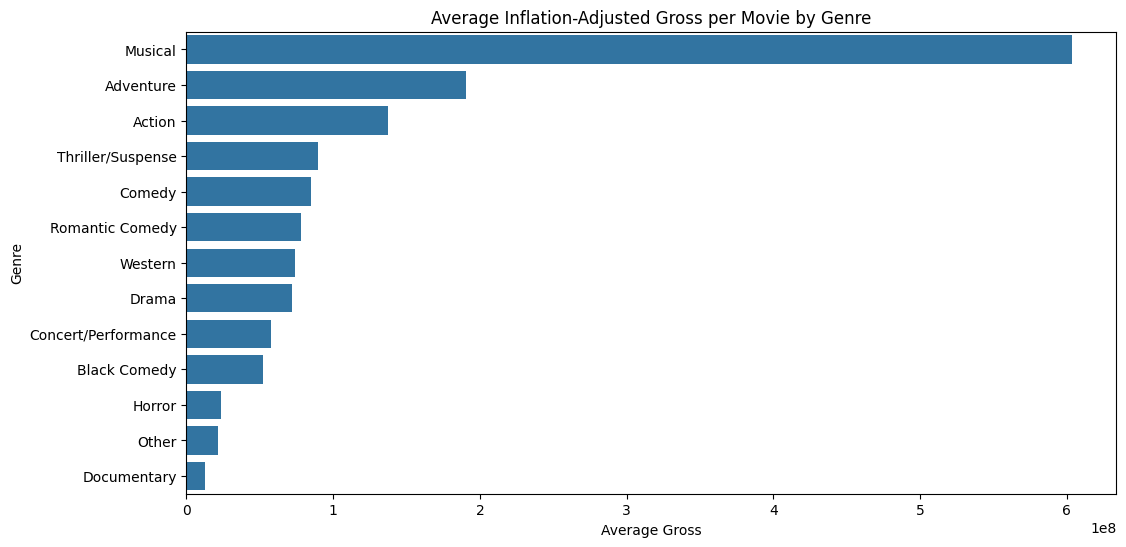

In [ ]:
# Average revenue per movie by genre 
genre_avg = df.groupby('genre')['inflation_adjusted_gross'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=genre_avg.values, y=genre_avg.index)
plt.title("Average Inflation-Adjusted Gross per Movie by Genre")
plt.xlabel("Average Gross")
plt.ylabel("Genre")
plt.show()


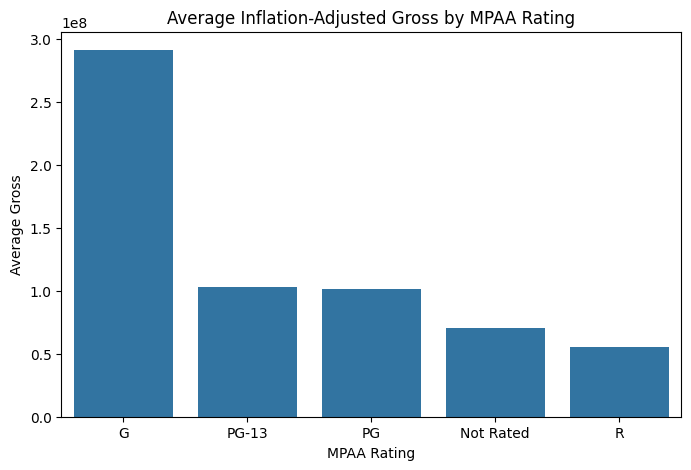

In [47]:
# Revenue by mpaa rating
rating_avg = df.groupby('mpaa_rating')['inflation_adjusted_gross'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=rating_avg.index, y=rating_avg.values)
plt.title("Average Inflation-Adjusted Gross by MPAA Rating")
plt.xlabel("MPAA Rating")
plt.ylabel("Average Gross")
plt.show()


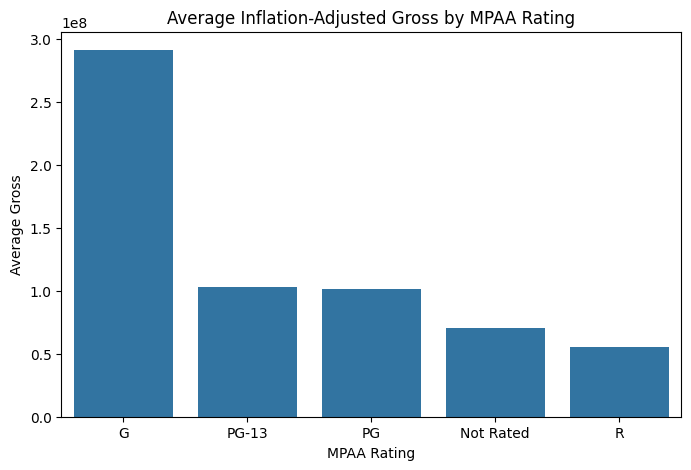

In [48]:
# Movies released over the Years
rating_avg = df.groupby('mpaa_rating')['inflation_adjusted_gross'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=rating_avg.index, y=rating_avg.values)
plt.title("Average Inflation-Adjusted Gross by MPAA Rating")
plt.xlabel("MPAA Rating")
plt.ylabel("Average Gross")
plt.show()


In [50]:
# Which genre movie earns the most 
top_movies_by_genre = (
    df.loc[
        df.groupby('genre')['inflation_adjusted_gross'].idxmax(),
        ['genre', 'movie_title', 'inflation_adjusted_gross']
    ]
    .sort_values('inflation_adjusted_gross', ascending=False)
)

top_movies_by_genre



,genre,movie_title,inflation_adjusted_gross
0,Musical,Snow White and the Seven Dwarfs,5228953251
1,Adventure,Pinocchio,2188229052
8,Comedy,101 Dalmatians,1362870985
6,Drama,Lady and the Tramp,1236035515
524,Action,The Avengers,660081224
309,Thriller/Suspense,The Sixth Sense,485424724
87,Romantic Comedy,Pretty Woman,356389765
23,Other,The Black Hole,120377374
164,Western,Tombstone,115781734
353,Black Comedy,The Royal Tenenbaums,76758193


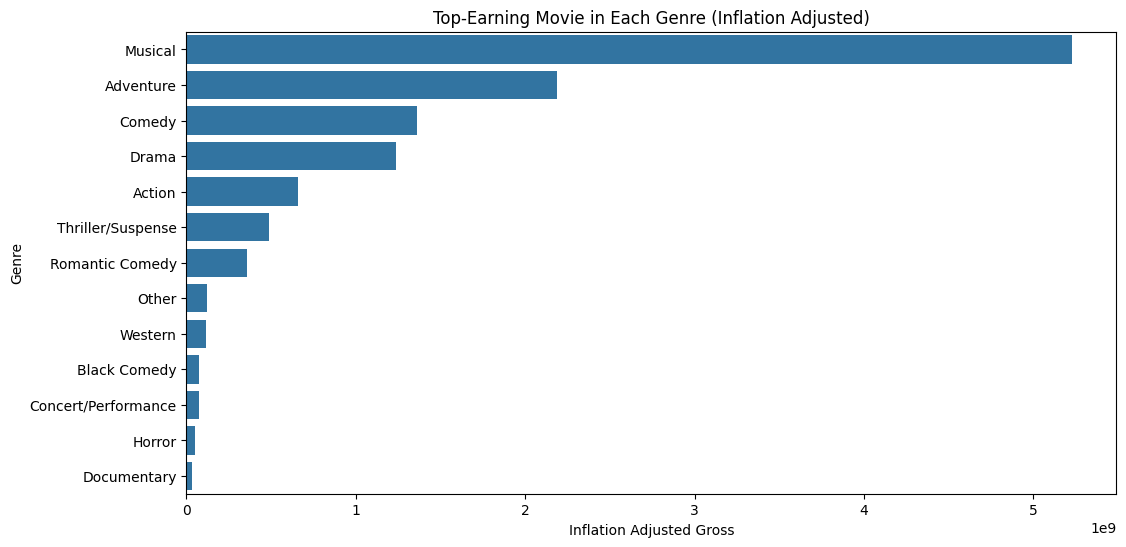

In [51]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=top_movies_by_genre,
    x='inflation_adjusted_gross',
    y='genre'
)

plt.title("Top-Earning Movie in Each Genre (Inflation Adjusted)")
plt.xlabel("Inflation Adjusted Gross")
plt.ylabel("Genre")
plt.show()


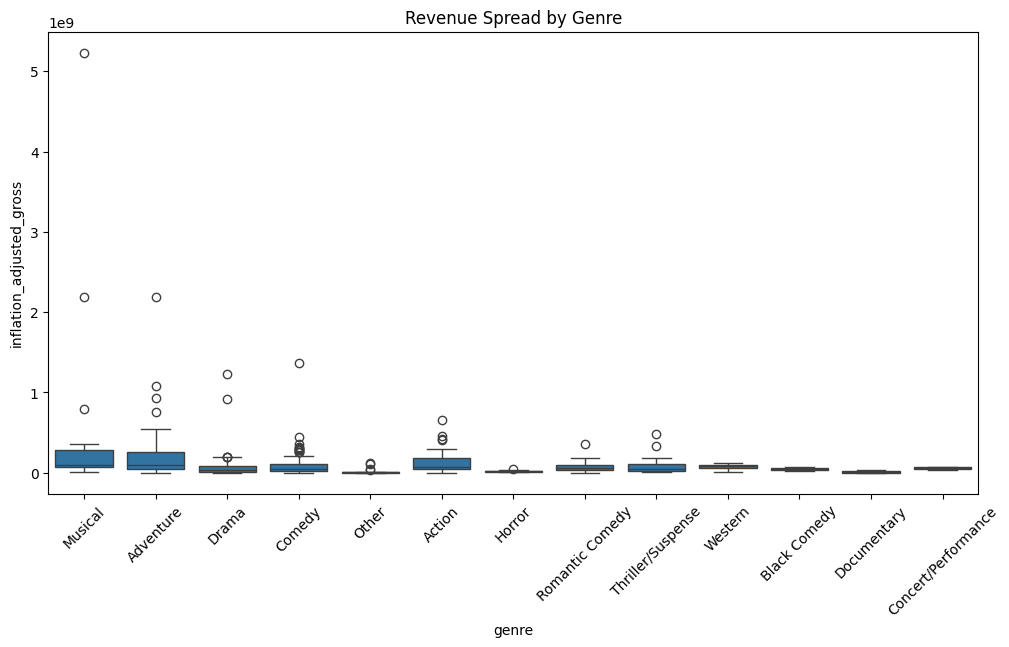

In [52]:
# Ouliers and Spread analysis
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='genre', y='inflation_adjusted_gross')
plt.xticks(rotation=45)
plt.title("Revenue Spread by Genre")
plt.show()


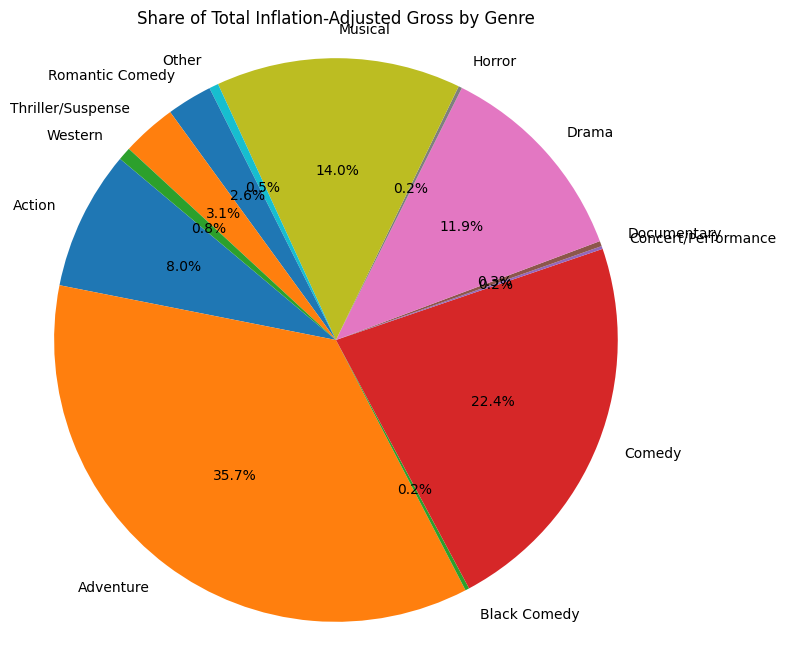

In [53]:
# Total earning by genre 
genre_gross = df.groupby('genre')['inflation_adjusted_gross'].sum()

plt.figure(figsize=(8,8))
plt.pie(
    genre_gross.values,
    labels=genre_gross.index,
    autopct='%1.1f%%',
    startangle=140
)

plt.title("Share of Total Inflation-Adjusted Gross by Genre")
plt.axis('equal')
plt.show()


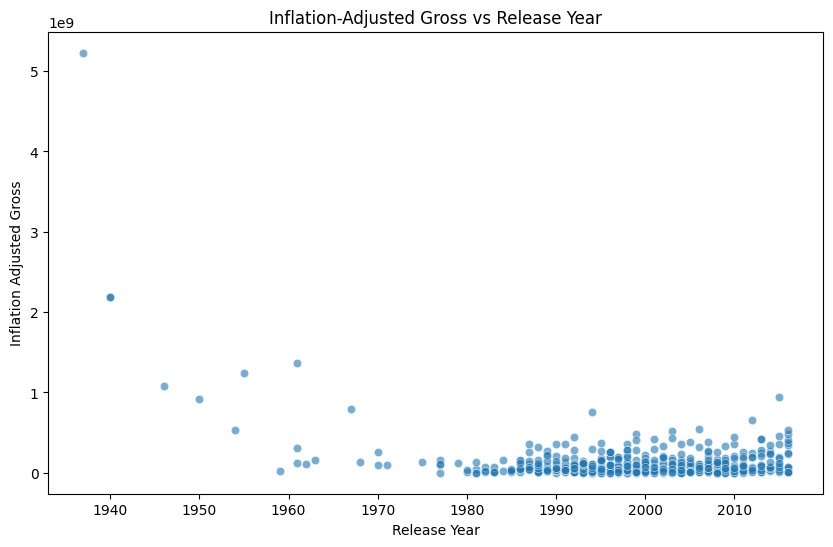

In [54]:
# Do old movies perform better than new one 
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='release_year',
    y='inflation_adjusted_gross',
    alpha=0.6
)

plt.title("Inflation-Adjusted Gross vs Release Year")
plt.xlabel("Release Year")
plt.ylabel("Inflation Adjusted Gross")
plt.show()


In [55]:
# are some genres more risky than others
genre_stats = df.groupby('genre')['inflation_adjusted_gross'].agg(['mean', 'std']).sort_values('std', ascending=False)
genre_stats


,mean,std
genre,,
Musical,6.035979e+08,1.346573e+09
Adventure,1.903974e+08,2.546016e+08
Drama,7.189302e+07,1.461092e+08
Action,1.374734e+08,1.453101e+08
Comedy,8.466773e+07,1.226476e+08
Thriller/Suspense,8.965379e+07,1.121188e+08
Romantic Comedy,7.777708e+07,7.985530e+07
Other,2.162373e+07,3.684336e+07
Western,7.381571e+07,3.637939e+07


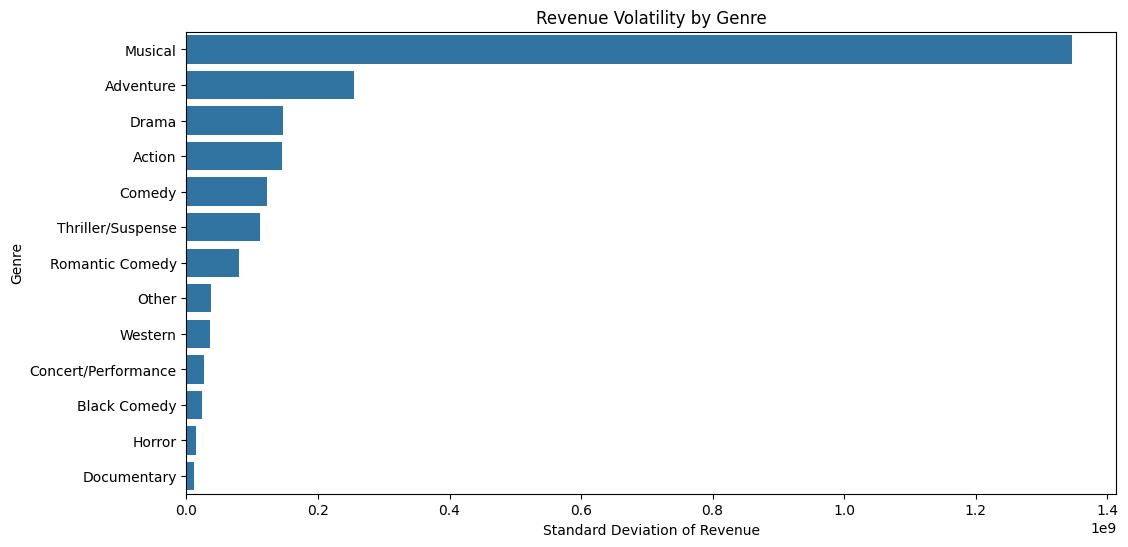

In [56]:
plt.figure(figsize=(12,6))
sns.barplot(x=genre_stats['std'], y=genre_stats.index)
plt.title("Revenue Volatility by Genre")
plt.xlabel("Standard Deviation of Revenue")
plt.ylabel("Genre")
plt.show()


In [57]:
# Does MPAA Rating affects revenue consistency 
rating_stats = df.groupby('mpaa_rating')['inflation_adjusted_gross'].agg(['mean', 'median', 'std'])
rating_stats


,mean,median,std
mpaa_rating,,,
G,2.912610e+08,103154765.5,6.695404e+08
Not Rated,7.047577e+07,32798382.0,1.265425e+08
PG,1.015414e+08,69055550.0,9.541297e+07
PG-13,1.029486e+08,51373912.0,1.425759e+08
R,5.530581e+07,31587673.5,6.703513e+07


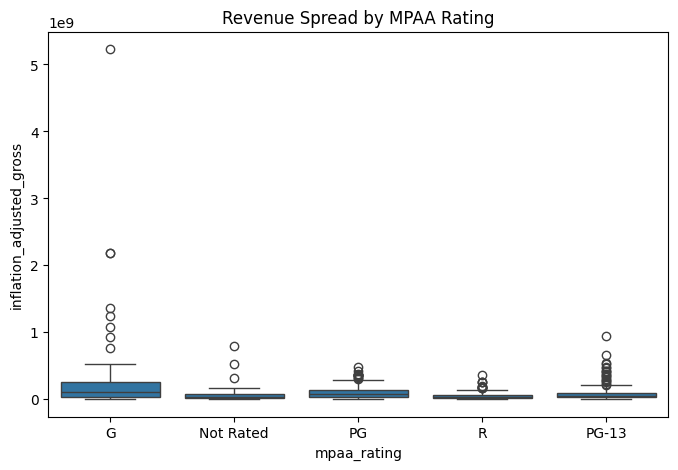

In [58]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='mpaa_rating', y='inflation_adjusted_gross')
plt.title("Revenue Spread by MPAA Rating")
plt.show()


In [59]:
# Top 10 movies of all time(inflation adjusted)
top_10_movies = df.sort_values(
    'inflation_adjusted_gross',
    ascending=False
).head(10)

top_10_movies[['movie_title', 'release_year', 'genre', 'inflation_adjusted_gross']]


,movie_title,release_year,genre,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937,Musical,5228953251
1,Pinocchio,1940,Adventure,2188229052
2,Fantasia,1940,Musical,2187090808
8,101 Dalmatians,1961,Comedy,1362870985
6,Lady and the Tramp,1955,Drama,1236035515
3,Song of the South,1946,Adventure,1078510579
564,Star Wars Ep. VII: The Force Awakens,2015,Adventure,936662225
4,Cinderella,1950,Drama,920608730
13,The Jungle Book,1967,Musical,789612346
179,The Lion King,1994,Adventure,761640898


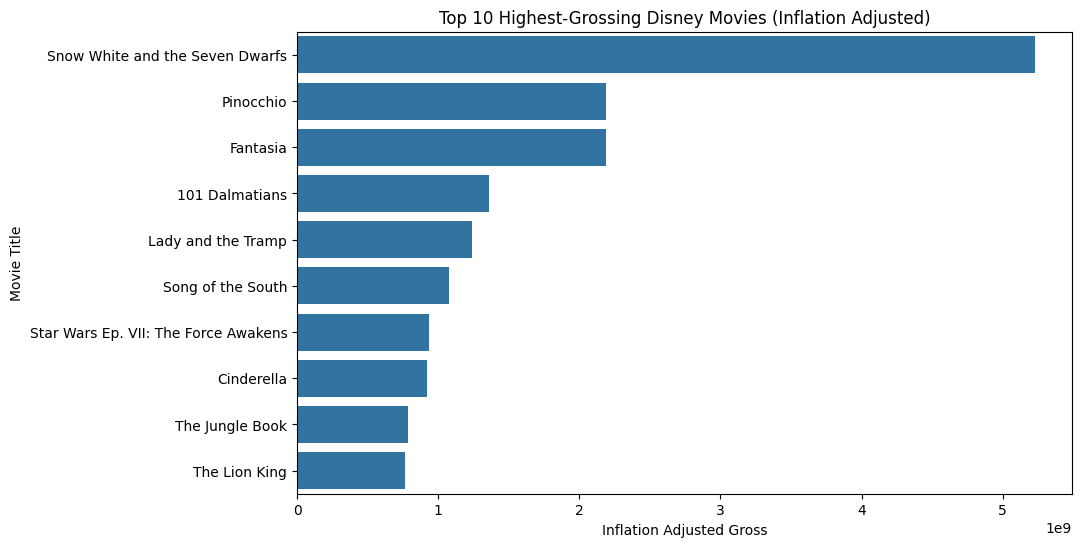

In [60]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_10_movies,
    x='inflation_adjusted_gross',
    y='movie_title'
)

plt.title("Top 10 Highest-Grossing Disney Movies (Inflation Adjusted)")
plt.xlabel("Inflation Adjusted Gross")
plt.ylabel("Movie Title")
plt.show()
